In [1]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
original_size_img = (1664, 1128)
half_size_img = (1177, 798)
five_percent_size_img = (372, 252)
two_half_size_img = (263, 178)

## Plotting Precision and Accuracy Function

In [3]:
def plot_loss_and_accuracy(results, final=False):
    
    if final:
        val_label="test"
    else:
        val_label="validation"

    # Extracting metrics from model fitting
    train_loss = results.history['loss']
    val_loss = results.history['val_loss']
    train_precision = results.history['precision']
    val_precision = results.history['val_precision']
    train_accuracy = results.history['binary_accuracy']
    val_accuracy = results.history['val_binary_accuracy']

    # Setting up plots
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 15))

    # Plotting loss info
    ax1.set_title("Loss")
    sns.lineplot(x=results.epoch, y=train_loss, ax=ax1, label="train")
    sns.lineplot(x=results.epoch, y=val_loss, ax=ax1, label=val_label)
    ax1.legend()

    #Plotting precision
    ax2.set_title("Precision")
    sns.lineplot(x=results.epoch, y=train_precision, ax=ax2, label="train")
    sns.lineplot(x=results.epoch, y=val_precision, ax=ax2, label=val_label)
    ax2.legend()
    
    # Plotting accuracy info
    ax3.set_title("Accuracy")
    sns.lineplot(x=results.epoch, y=train_accuracy, ax=ax3, label="train")
    sns.lineplot(x=results.epoch, y=val_accuracy, ax=ax3, label=val_label)
    ax3.legend()

## Image Data Generator

In [4]:
# Directory path
train_data_dir = '../data/localdata/chest_xray/train'
test_data_dir = '../data/localdata/chest_xray/test'

# Get all the data in the directory data/localdata/chest_xray/test (624 images), and reshape them
training_generator = ImageDataGenerator(rescale=1/255, validation_split=0.25,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
test_generator = ImageDataGenerator(rescale=1/255)

train_set = training_generator.flow_from_directory(
        train_data_dir, target_size=(200, 200), batch_size=32, color_mode='grayscale', 
        class_mode='binary', seed=42, subset='training')

val_set = training_generator.flow_from_directory(
    train_data_dir, target_size=(200, 200), batch_size=32, color_mode='grayscale', 
         class_mode='binary', seed=42, subset='validation')

test_set = test_generator.flow_from_directory(
        test_data_dir, target_size=(200, 200), batch_size=32, color_mode='grayscale', class_mode='binary')

# Create the datasets
train_images, train_labels = next(train_set)
test_images, test_labels = next(test_set)

Found 6280 images belonging to 2 classes.
Found 2092 images belonging to 2 classes.
Found 1140 images belonging to 2 classes.


## First Complicated Model

In [5]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32,
                       kernel_size=(3, 3),
                       activation='relu',
                       input_shape=(200, 200, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', ))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', ))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])

early_stop = EarlyStopping(monitor='val_binary_accuracy', min_delta=0.001,
                           verbose=1, patience=4, restore_best_weights=True,
                           mode='auto')

results = model.fit(train_set, epochs=50, validation_data=val_set, callbacks=early_stop)

Metal device set to: Apple M1


2023-09-12 18:04:09.915176: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-09-12 18:04:09.915753: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Epoch 1/50


2023-09-12 18:04:10.228558: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-09-12 18:04:10.441150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - ETA: 0s - loss: 0.3330 - precision: 0.8859 - binary_accuracy: 0.8537

2023-09-12 18:04:44.363364: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 43s 215ms/step - loss: 0.3330 - precision: 0.8859 - binary_accuracy: 0.8537 - val_loss: 0.2409 - val_precision: 0.9293 - val_binary_accuracy: 0.8967
Epoch 2/50
197/197 [==============================] - 41s 207ms/step - loss: 0.2596 - precision: 0.9225 - binary_accuracy: 0.8836 - val_loss: 0.1993 - val_precision: 0.9505 - val_binary_accuracy: 0.9159
Epoch 3/50
197/197 [==============================] - 42s 212ms/step - loss: 0.2214 - precision: 0.9381 - binary_accuracy: 0.9061 - val_loss: 0.1968 - val_precision: 0.9688 - val_binary_accuracy: 0.9202
Epoch 4/50
197/197 [==============================] - 42s 215ms/step - loss: 0.2094 - precision: 0.9416 - binary_accuracy: 0.9096 - val_loss: 0.1696 - val_precision: 0.9687 - val_binary_accuracy: 0.9326
Epoch 5/50
197/197 [==============================] - 43s 217ms/step - loss: 0.1881 - precision: 0.9497 - binary_accuracy: 0.9210 - val_loss: 0.1544 - val_precision: 0.9366 - val_binary_accuracy: 0.9

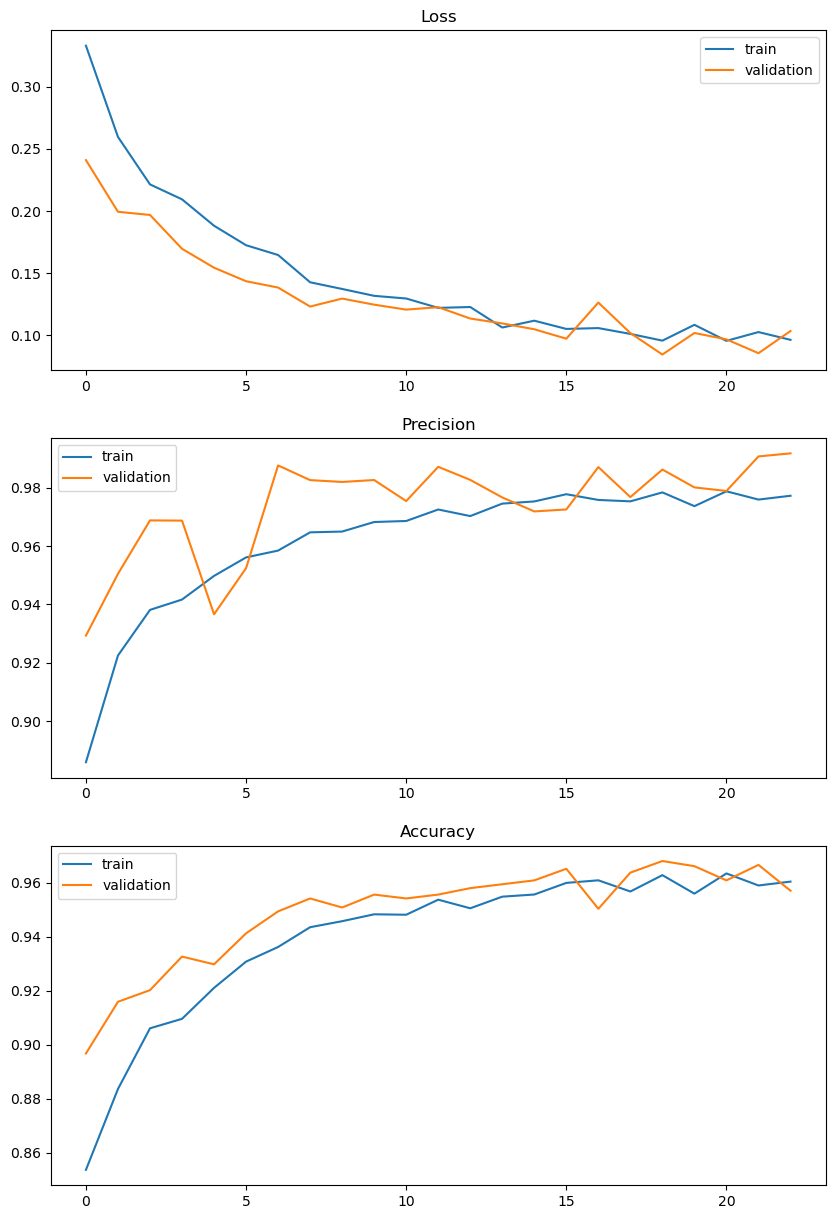

In [6]:
plot_loss_and_accuracy(results)

In [7]:
model.evaluate(test_set)

36/36 [==============================] - 4s 108ms/step - loss: 0.3294 - precision: 0.8244 - binary_accuracy: 0.8614


[0.32943233847618103, 0.8244085311889648, 0.8614035248756409]

## Hybrid Augmentation with Lydia Best Model

In [8]:
best_model = models.Sequential()
best_model.add(layers.Conv2D(filters=32,
                        kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(200, 200, 1)))
best_model.add(layers.MaxPooling2D(pool_size=(2, 2)))
best_model.add(layers.Flatten())
best_model.add(layers.Dense(64, activation='relu'))
best_model.add(layers.Dense(1, activation='sigmoid'))

best_model.compile(optimizer='Adam',
              loss='BinaryCrossentropy',
              metrics=['Precision', 'BinaryAccuracy'])

checkpoint_path = "best_model/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

early_stop = EarlyStopping(monitor='val_binary_accuracy', min_delta=0.001,
                           verbose=1, patience=4, restore_best_weights=True,
                           mode='auto')

results_best = best_model.fit(train_set, epochs=50, validation_data=val_set,
                    callbacks=[ early_stop])

Epoch 1/50


2023-09-12 18:23:27.988558: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - ETA: 0s - loss: 0.4257 - precision: 0.8728 - binary_accuracy: 0.8420

2023-09-12 18:24:06.076488: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


197/197 [==============================] - 48s 243ms/step - loss: 0.4257 - precision: 0.8728 - binary_accuracy: 0.8420 - val_loss: 0.2974 - val_precision: 0.8599 - val_binary_accuracy: 0.8595
Epoch 2/50
197/197 [==============================] - 52s 264ms/step - loss: 0.2620 - precision: 0.9146 - binary_accuracy: 0.8884 - val_loss: 0.2139 - val_precision: 0.9417 - val_binary_accuracy: 0.9125
Epoch 3/50
197/197 [==============================] - 69s 351ms/step - loss: 0.2346 - precision: 0.9255 - binary_accuracy: 0.8981 - val_loss: 0.1917 - val_precision: 0.9254 - val_binary_accuracy: 0.9116
Epoch 4/50
197/197 [==============================] - 55s 281ms/step - loss: 0.2327 - precision: 0.9286 - binary_accuracy: 0.9022 - val_loss: 0.3119 - val_precision: 0.9887 - val_binary_accuracy: 0.8633
Epoch 5/50
197/197 [==============================] - 53s 266ms/step - loss: 0.2336 - precision: 0.9312 - binary_accuracy: 0.9084 - val_loss: 0.1854 - val_precision: 0.9308 - val_binary_accuracy: 0.9

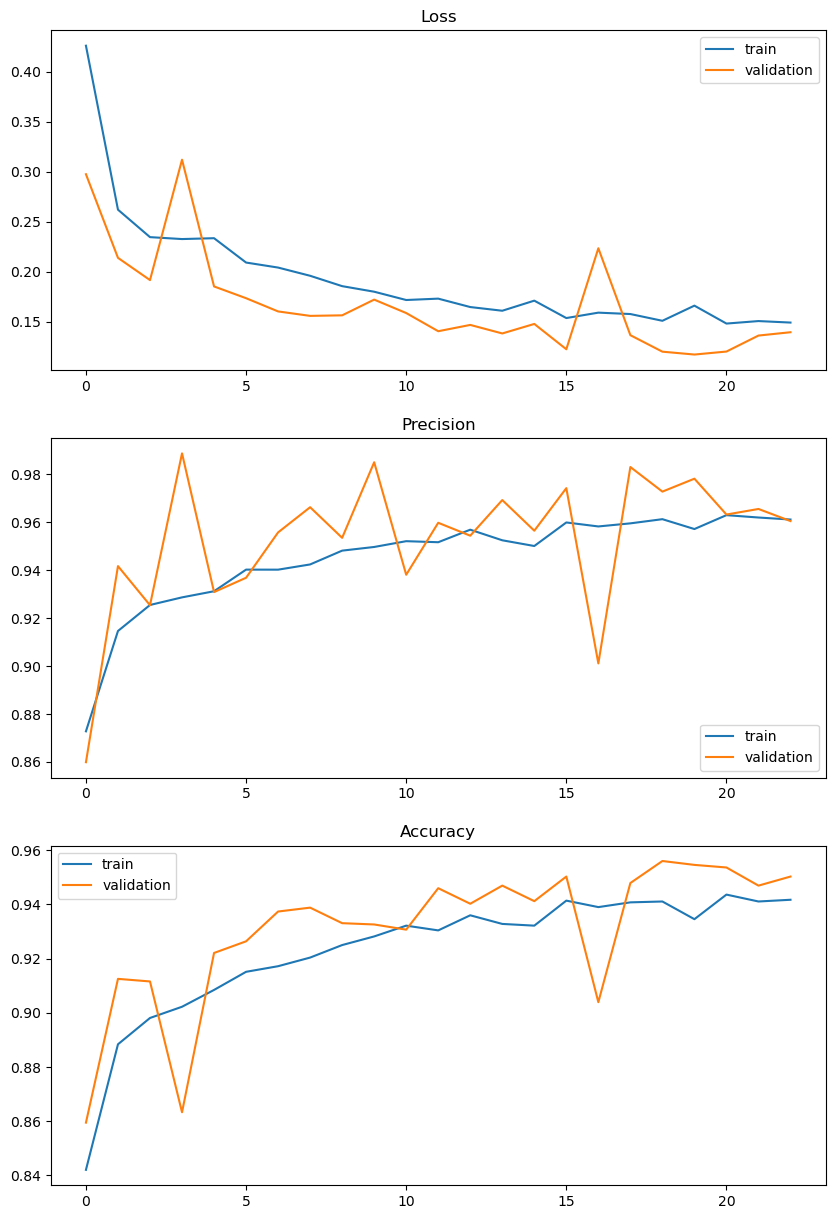

In [9]:
plot_loss_and_accuracy(results_best)

In [10]:
best_model.evaluate(test_set)

36/36 [==============================] - 6s 156ms/step - loss: 0.4720 - precision: 0.7729 - binary_accuracy: 0.8219


[0.4720146358013153, 0.7729358077049255, 0.8219298124313354]

## Simple Model (CNN)